In [1]:
import os,_config,swat,graphviz

In [2]:
user,pswd = _config.login()
host='10.104.19.252' #beast
portnum=5570 #CAS Binary Port
conn = swat.CAS(host,portnum,user,pswd)

In [3]:
conn.setsessopt(caslib='Public')

NOTE: 'Public' is now the active caslib.


+ Elapsed: 0.0165s, user: 0.00718s, sys: 0.00238s, mem: 0.787mb

In [4]:
# import the necessary packages
from keras.models import Sequential
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.layers.core import Activation
from keras.layers.core import Flatten
from keras.layers.core import Dense
from keras import backend as K

/opt/anaconda/anaconda3/envs/dl4viya/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [5]:
class LeNet:
    @staticmethod
    def build(width, height, depth, classes):
        # initialize the model
        model = Sequential()
        inputShape = (height, width, depth)

        # if we are using "channels first", update the input shape
        # this happens only if we use say Theano - so dowsn
        if K.image_data_format() == "channels_first":
            inputShape = (depth, height, width)

        # first set of CONV => RELU => POOL layers
        model.add(Conv2D(20, (5, 5), padding="same",
                         input_shape=inputShape))
        model.add(Activation("relu"))
        model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

        # second set of CONV => RELU => POOL layers
        model.add(Conv2D(50, (5, 5), padding="same"))
        model.add(Activation("relu"))
        model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

        # first (and only) set of FC => RELU layers
        model.add(Flatten())
        model.add(Dense(500))
        model.add(Activation("relu"))

        # softmax classifier
        model.add(Dense(classes))
        model.add(Activation("softmax"))

        # return the constructed network architecture
        return model

In [7]:
keras_lenet = LeNet.build(width=28, height=28, depth=1, classes=2)

In [8]:
keras_lenet.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 28, 28, 20)        520       
_________________________________________________________________
activation_5 (Activation)    (None, 28, 28, 20)        0         
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 14, 14, 20)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 14, 14, 50)        25050     
_________________________________________________________________
activation_6 (Activation)    (None, 14, 14, 50)        0         
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 7, 7, 50)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 2450)              0         
__________

In [9]:
from dlpy import Model

In [10]:
cas_model = Model.from_keras_model(conn=conn, keras_model=keras_lenet, output_model_table='cas_lenet')

NOTE: Added action set 'deeplearn'.
NOTE: Model table is attached successfully!
NOTE: Model is named to "cas_lenet" according to the model name in the table.


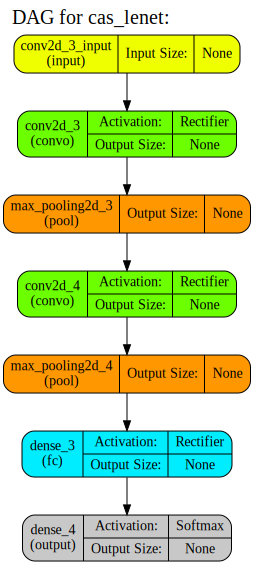

In [11]:
cas_model.plot_network()

In [13]:
# Import Image Table
from dlpy.images import ImageTable
img_path='/home/viyademo01/casuser/SMILEsmileD/SMILEs'

In [14]:
smiles_dataset = ImageTable.load_files(conn, path=img_path)
smiles_dataset.shuffle(casout=dict(name=smiles_dataset, replace=True))

[caslib]

 'Public'

[tableName]

 'IMAGEDATA_RDE7PQ'

[casTable]

 CASTable('IMAGEDATA_RDE7PQ', caslib='Public')

+ Elapsed: 0.322s, user: 0.044s, sys: 0.382s, mem: 110mb

In [15]:
smiles_dataset.image_summary

jpg                 14792
minWidth               51
maxWidth               83
minHeight              51
maxHeight              83
meanWidth         64.0984
meanHeight        64.0984
mean1stChannel    126.326
min1stChannel           0
max1stChannel         255
mean2ndChannel    126.326
min2ndChannel           0
max2ndChannel         255
mean3rdChannel    126.326
min3rdChannel           0
max3rdChannel         255
dtype: object

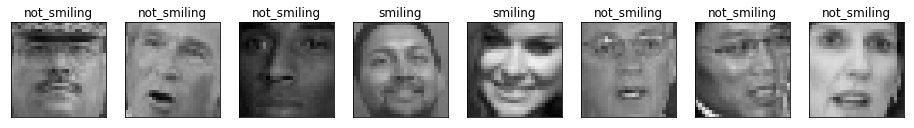

In [16]:
smiles_dataset.resize(width=28,height=28,inplace=True)
smiles_dataset.show(nimages=8,ncol=8,randomize=True)

In [17]:
from dlpy.splitting import two_way_split # To create test_train_split
tr_img, te_img = two_way_split(smiles_dataset, test_rate=20, seed=123)

In [18]:
cas_model.fit(data=tr_img,mini_batch_size=1,max_epochs=3,lr=0.0001)

NOTE: Training from scratch.
NOTE:  The Synchronous mode is enabled.
NOTE:  The total number of parameters is 1252072.
NOTE:  The approximate memory cost is 142.00 MB.
NOTE:  Loading weights cost       0.00 (s).
NOTE:  Initializing each layer cost       0.67 (s).
NOTE:  The total number of workers is 2.
NOTE:  The total number of threads on each worker is 24.
NOTE:  The total number of minibatch size per thread on each worker is 1.
NOTE:  The maximum number of minibatch size across all workers for the synchronous mode is 48.
NOTE:  Target variable: _label_
NOTE:  Number of levels for the target variable:      2
NOTE:  Levels for the target variable:
NOTE:  Level      0: not_smiling
NOTE:  Level      1: smiling    
NOTE:  Number of input variables:     1
NOTE:  Number of numeric input variables:      1
NOTE:  Batch              nUsed   Learning Rate     Loss    Fit Error      Time (s) (Training)
NOTE:        0               48  0.0001          7.6753      0.3333         0.30
NOTE:      

NOTE:       95               48  0.0001          0.6109      0.2708         0.17
NOTE:       96               48  0.0001          0.7603      0.3125         0.11
NOTE:       97               48  0.0001          1.5794      0.5208         0.14
NOTE:       98               48  0.0001          2.4507      0.3125         0.11
NOTE:       99               48  0.0001          0.8398      0.2917         0.11
NOTE:      100               48  0.0001          0.6223        0.25         0.09
NOTE:      101               48  0.0001          0.8855        0.25         0.14
NOTE:      102               48  0.0001          1.0352      0.4375         0.10
NOTE:      103               48  0.0001          2.0098       0.375         0.10
NOTE:      104               48  0.0001          1.5663         0.5         0.11
NOTE:      105               48  0.0001          1.5846       0.375         0.10
NOTE:      106               48  0.0001          1.0567      0.3542         0.14
NOTE:      107              

NOTE:      204               48  0.0001          0.3581      0.1458         0.14
NOTE:      205               48  0.0001          0.3244      0.1458         0.14
NOTE:      206               48  0.0001          0.5869      0.2292         0.10
NOTE:      207               48  0.0001          0.4886      0.2292         0.10
NOTE:      208               48  0.0001          0.2777      0.0625         0.09
NOTE:      209               48  0.0001          0.3934      0.1667         0.08
NOTE:      210               48  0.0001          0.3715      0.1667         0.08
NOTE:      211               48  0.0001          0.5625      0.3125         0.09
NOTE:      212               48  0.0001          0.4635      0.2083         0.09
NOTE:      213               48  0.0001           0.532      0.2083         0.09
NOTE:      214               48  0.0001          0.3515       0.125         0.11
NOTE:      215               33  0.0001          0.4419      0.2121         0.08
NOTE:      216              

NOTE:       29               48  0.0001          0.6068      0.1667         0.11
NOTE:       30               48  0.0001          0.3992      0.2083         0.13
NOTE:       31               48  0.0001          0.6111      0.1875         0.11
NOTE:       32               48  0.0001          0.5444      0.2083         0.09
NOTE:       33               48  0.0001          0.3337       0.125         0.10
NOTE:       34               48  0.0001          0.3576       0.125         0.13
NOTE:       35               48  0.0001          0.2156      0.1042         0.08
NOTE:       36               48  0.0001          0.5639        0.25         0.07
NOTE:       37               48  0.0001          0.2544      0.0833         0.08
NOTE:       38               48  0.0001          0.4792      0.2083         0.08
NOTE:       39               48  0.0001          0.2304      0.0833         0.11
NOTE:       40               48  0.0001          0.2663      0.1042         0.08
NOTE:       41              

NOTE:      137               48  0.0001          0.5365      0.2917         0.09
NOTE:      138               48  0.0001          0.3319      0.1458         0.10
NOTE:      139               48  0.0001          0.5745      0.1875         0.08
NOTE:      140               48  0.0001          0.3375       0.125         0.08
NOTE:      141               48  0.0001          0.3171      0.1667         0.12
NOTE:      142               48  0.0001          0.5407        0.25         0.09
NOTE:      143               48  0.0001          0.4203      0.2292         0.10
NOTE:      144               48  0.0001          0.2695      0.1042         0.12
NOTE:      145               48  0.0001          0.4528      0.2083         0.16
NOTE:      146               48  0.0001          0.2131      0.0625         0.11
NOTE:      147               48  0.0001          0.3775      0.1667         0.10
NOTE:      148               48  0.0001          0.4872      0.2083         0.11
NOTE:      149              

NOTE:      242               24  0.0001          0.4694      0.1667         0.07
NOTE:      243               24  0.0001          0.2159      0.0833         0.08
NOTE:      244               24  0.0001            0.44      0.1667         0.08
NOTE:      245               24  0.0001          0.2959      0.0833         0.07
NOTE:      246               24  0.0001           0.228      0.0833         0.07
NOTE:      247               24  0.0001          0.2904      0.0417         0.06
NOTE:      248               24  0.0001          0.2665       0.125         0.07
NOTE:      249               24  0.0001           0.356      0.2083         0.07
NOTE:      250               24  0.0001          0.3113      0.2083         0.07
NOTE:      251               24  0.0001          0.3486      0.1667         0.06
NOTE:      252               24  0.0001          0.5405      0.2083         0.07
NOTE:      253               24  0.0001          0.5944        0.25         0.06
NOTE:      254              

NOTE:       66               48  0.0001          0.6064      0.2083         0.13
NOTE:       67               48  0.0001          0.3824      0.1458         0.09
NOTE:       68               48  0.0001          0.2941      0.1042         0.08
NOTE:       69               48  0.0001          0.2803      0.1042         0.09
NOTE:       70               48  0.0001           0.334       0.125         0.10
NOTE:       71               48  0.0001          0.3358      0.1458         0.09
NOTE:       72               48  0.0001          0.6638      0.2083         0.10
NOTE:       73               48  0.0001          0.3929      0.1667         0.08
NOTE:       74               48  0.0001          0.4739      0.2292         0.10
NOTE:       75               48  0.0001          0.3112       0.125         0.12
NOTE:       76               48  0.0001           0.237       0.125         0.09
NOTE:       77               48  0.0001          0.2429      0.1042         0.09
NOTE:       78              

NOTE:      176               48  0.0001          0.5797        0.25         0.18
NOTE:      177               48  0.0001          0.2858       0.125         0.17
NOTE:      178               48  0.0001          0.4891      0.1875         0.13
NOTE:      179               48  0.0001          0.2417      0.0625         0.11
NOTE:      180               48  0.0001          0.6129      0.1875         0.11
NOTE:      181               48  0.0001          0.4771      0.2292         0.16
NOTE:      182               48  0.0001          0.3528      0.1458         0.10
NOTE:      183               48  0.0001          0.2483      0.1042         0.10
NOTE:      184               48  0.0001          0.2028      0.0625         0.17
NOTE:      185               48  0.0001          0.3759      0.1875         0.14
NOTE:      186               48  0.0001          0.2296      0.1458         0.10
NOTE:      187               48  0.0001          0.4399      0.1667         0.11
NOTE:      188              

,Descr,Value
0,Model Name,cas_lenet
1,Model Type,Convolutional Neural Network
2,Number of Layers,7
3,Number of Input Layers,1
4,Number of Output Layers,1
5,Number of Convolutional Layers,2
6,Number of Pooling Layers,2
7,Number of Fully Connected Layers,1
8,Number of Weight Parameters,1251500
9,Number of Bias Parameters,572


In [19]:
cas_model.predict(te_img)

[ScoreInfo]

                          Descr         Value
 0  Number of Observations Read          2958
 1  Number of Observations Used          2958
 2  Misclassification Error (%)      16.26099
 3                   Loss Error      0.479346

[OutputCasTables]

    casLib              Name  Rows  Columns  \
 0  Public  Valid_Res_KhcmHX  2958        8   
 
                                         casTable  
 0  CASTable('Valid_Res_KhcmHX', caslib='Public')  

+ Elapsed: 0.839s, user: 2.64s, sys: 0.233s, mem: 209mb

In [24]:
#cas_model.heat_map_analysis(data=te_img, mask_width=7, mask_height=7, step_size=4)

In [20]:
cas_model.deploy('/tmp/smiles', output_format='astore')

NOTE: Model astore file saved successfully.


In [21]:
conn.loadactionset('aStore')

NOTE: Added action set 'aStore'.


[actionset]

 'aStore'

+ Elapsed: 0.00987s, user: 0.00439s, sys: 0.00196s, mem: 0.583mb

In [28]:
conn.deeplearn.dlexportmodel(modeltable='CAS_LENET',initweights='cas_lenet_weights', casout={'caslib':'Public',
                                                                                            'name':'cas_lenet_score_v2',
                                                                                            'promote':True})

NOTE: Wrote 5016121 bytes to the savestate file cas_lenet_score_v2.


,casLib,Name
0,Public,cas_lenet_score_v2


In [29]:
conn.tableinfo()

,Name,Label,Rows,Columns,IndexedColumns,Encoding,CreateTimeFormatted,ModTimeFormatted,AccessTimeFormatted,JavaCharSet,...,ModTime,AccessTime,Global,Repeated,View,SourceName,SourceCaslib,Compressed,Creator,Modifier
0,CAS_LENET,,83,5,0,utf-8,05Sep2018:02:30:44,05Sep2018:02:30:44,05Sep2018:02:35:50,UTF8,...,1.851734e+09,1.851734e+09,0,0,0,,,0,viyademo01,
1,IMAGEDATA_YNH8QT,,14792,3,0,utf-8,05Sep2018:02:31:46,05Sep2018:02:31:46,05Sep2018:02:32:32,UTF8,...,1.851734e+09,1.851734e+09,0,0,0,,,0,viyademo01,
2,IMAGEDATA_XPN1G0,,11834,4,0,utf-8,05Sep2018:02:32:32,05Sep2018:02:32:32,05Sep2018:02:32:33,UTF8,...,1.851734e+09,1.851734e+09,0,0,0,,,0,viyademo01,
3,IMAGEDATA_OL80KV,,2958,4,0,utf-8,05Sep2018:02:32:33,05Sep2018:02:32:33,05Sep2018:02:32:34,UTF8,...,1.851734e+09,1.851734e+09,0,0,0,,,0,viyademo01,
4,IMAGEDATA_MENH0E,,11834,3,0,utf-8,05Sep2018:02:32:33,05Sep2018:02:32:33,05Sep2018:02:32:52,UTF8,...,1.851734e+09,1.851734e+09,0,0,0,,,0,viyademo01,
5,IMAGEDATA_OWBTJD,,2958,3,0,utf-8,05Sep2018:02:32:34,05Sep2018:02:32:34,05Sep2018:02:34:44,UTF8,...,1.851734e+09,1.851734e+09,0,0,0,,,0,viyademo01,
6,CAS_LENET_WEIGHTS,,1252072,3,0,utf-8,05Sep2018:02:34:10,05Sep2018:02:34:10,05Sep2018:02:35:50,UTF8,...,1.851734e+09,1.851734e+09,0,0,0,,,0,viyademo01,
7,VALID_RES_NRTSGA,,2958,8,0,utf-8,05Sep2018:02:34:36,05Sep2018:02:34:36,05Sep2018:02:34:36,UTF8,...,1.851734e+09,1.851734e+09,0,0,0,,,0,viyademo01,
8,IMAGEDATA_BI4VCG,,2953,4,0,utf-8,05Sep2018:02:34:44,05Sep2018:02:34:44,05Sep2018:02:34:44,UTF8,...,1.851734e+09,1.851734e+09,0,0,0,,,0,viyademo01,
9,IMAGEDATA_UTWKZL,,5,4,0,utf-8,05Sep2018:02:34:44,05Sep2018:02:34:44,05Sep2018:02:34:44,UTF8,...,1.851734e+09,1.851734e+09,0,0,0,,,0,viyademo01,


For testing out ASTORE Scoring

In [30]:
m=conn.describe(
     rstore='CAS_LENET_SCORE',
     epcode=True
    )
m
#print(m.epcode)

[Key]

 Store Key
 
                                         Key
 0  0F56F630D53621A86ECE786E25A472DF079B29E1

[Description]

 Run Information
 
          Attribute               Value
 0  Analytic Engine           deeplearn
 1     Time Created  04Sep2018:22:35:32

[InputVariables]

 Input Variables
 
       Name  Length   Role      Type RawType FormatName
 0  _image_  1396.0  Input  Interval    Char           

[OutputVariables]

 Output Variables
 
                    Name  Length  Type                           Label
 0  P__label_not_smiling     8.0   Num  Predicted: _label_=not_smiling
 1      P__label_smiling     8.0   Num      Predicted: _label_=smiling
 2             I__label_    11.0  Char                   Into: _label_

[epcode]

 ' data sasep.out;\n\t dcl package score sc();\n\t dcl nchar(1396) "_image_";\n\t dcl double "P__label_not_smiling" having label n\'Predicted: _label_=not_smiling\';\n\t dcl double "P__label_smiling" having label n\'Predicted: _label_=smiling\';\n\t dcl nchar(11) "I__label_" having label n\'Into: _label_\';\n\t Keep \n\t\t "P__label_not_smiling" \n\t\t "P__label_smiling" \n\t\t "I__label_" \n\t\t;\n\t varlist allvars[_all_];\n\t method init();\n\t\t sc.setvars(allvars);\n\t\t sc.setKey(n\'0F56F630D53621A86ECE786E25A472DF079B29E1\');\n\t end;\n\t method preScoreRecord();\n\t end;\n\t method postScoreRecord();\n\t end;\n\t method term();\n\t end;\n\t method run();\n\t\t set sasep.in;\n\t\t preScoreRecord();\n\t\t sc.scoreRecord();\n\t\t postScoreRecord();\n\t end;\n enddata;\n'

+ Elapsed: 0.258s, user: 0.537s, sys: 0.038s, mem: 39.4mb

In [32]:
# Import Image Table
from dlpy.images import ImageTable
score_img_path='/home/viyademo01/casuser/SMILEsmileD/score_imgs'

In [33]:
score_data = ImageTable.load_files(conn, path=score_img_path)

score_data.resize(width=28,height=28,inplace=True)

score_cas_tbl = score_data.tableinfo()['TableInfo']['Name'][0]

In [34]:
conn.score(table=score_cas_tbl, 
           out = score_cas_tbl + '_scored',
          rstore='CAS_LENET_SCORE')

,Task,Seconds,Percent
0,Loading the Store,0.139912,0.220156
1,Creating the State,0.270946,0.426341
2,Scoring,0.224630,0.353462
3,Total,0.635515,1.000000


In [35]:
scored_table = conn.CASTable(score_cas_tbl + '_scored')

In [36]:
scored_table.head()

,P__label_not_smiling,P__label_smiling,I__label_
0,0.277690,0.722310,smiling
1,0.502408,0.497592,not_smiling
2,0.005880,0.994120,smiling


In [27]:
score_data.head()

,_filename_0,_image_,_label_
0,10011.jpg,b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00...,
1,139.jpg,b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00...,
2,1000.jpg,b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00...,


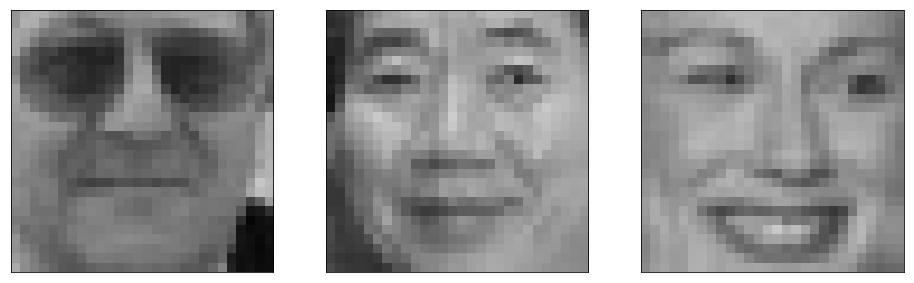

In [37]:
score_data.show()

In [38]:
conn.close()